In [3]:
import pandas as pd
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import gensim 
import gensim.corpora as corpora 

In [4]:
from gensim.models import LsiModel

In [5]:
data = pd.read_csv("news_articles.csv")

In [6]:
articles = data['content']

In [7]:
articles = articles.str.lower().apply(lambda x: re.sub(r"([^\w\s])", '',x))

#stop words removal 

en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))

#tokenize 
articles = articles.apply(lambda x: word_tokenize(x))

#stemming (done for speed as we have a lot of text)
ps = PorterStemmer()
articles = articles.apply(lambda tokens: [ps.stem(token) for token in tokens])




In [8]:
dictionary = corpora.Dictionary(articles)
print(dictionary)


Dictionary<8693 unique tokens: ['10', '100', '108', '15', '155']...>


In [9]:
doc_term = [dictionary.doc2bow(text) for text in articles]

In [11]:
num_topics = 2

In [12]:
lsa_model = LsiModel(corpus=doc_term,
                    id2word=dictionary,
                    num_topics= num_topics)

In [14]:
print(lsa_model.print_topics(num_topics=num_topics , num_words=5))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'), (1, '0.537*"mr" + 0.319*"trump" + -0.286*"said" + -0.242*"saudi" + -0.142*"weight"')]


In [15]:
##optimizing topics 

from gensim.models.coherencemodel import CoherenceModel
import matplotlib as plt

In [16]:
coherence_values = []
model_list = []

In [17]:
min_topics = 2
max_topics = 11

In [19]:
for num_topics_i in range(min_topics, max_topics+1):
    model = LsiModel(corpus=doc_term, id2word=dictionary, num_topics=num_topics_i)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=articles, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

In [22]:
import matplotlib.pyplot as plt 

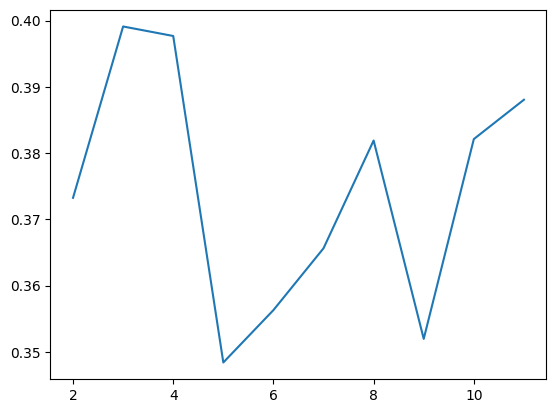

In [23]:
plt.plot(range(min_topics,max_topics+1), coherence_values)

In [25]:
final_num_topics = 3 # since the highest point is on the 3rd point in the graph
final_lsa_model = LsiModel(corpus=doc_term, id2word=dictionary, num_topics=final_num_topics)
print(final_lsa_model.print_topics(num_topics=final_num_topics, num_words=10))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would" + 0.108*"year" + 0.102*"one" + 0.091*"like" + 0.090*"peopl" + 0.086*"new"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight" + 0.140*"taliban" + 0.120*"one" + 0.120*"dr" + 0.120*"peopl" + 0.107*"year"'), (2, '-0.460*"saudi" + -0.264*"taliban" + 0.249*"weight" + -0.194*"afghanistan" + 0.191*"dr" + -0.189*"arabia" + -0.174*"afghan" + -0.139*"offici" + 0.139*"diet" + -0.127*"state"')]
